## Import libraries required

In [2]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils.io_utils import HDF5Matrix

%matplotlib inline

/home/megha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the data in HDF5 matrix format

### Training data

Q. How do you test whether the current dataset is loaded? 

A: Print the size to test whether the right dataset is loaded

In [5]:
base_path = os.path.join('data')
train_h5_path = os.path.join(base_path, 'food_c101_n10099_r32x32x1.h5')


In [6]:
X_train = HDF5Matrix(train_h5_path, 'images')[:]
y_train = HDF5Matrix(train_h5_path, 'category')[:]
y_train_cat = np.argmax(y_train,-1)
print('In Data',X_train.shape,'=>', y_train.shape, '=>', y_train_cat.shape)

In Data (10099, 32, 32, 1) => (10099, 101) => (10099,)


### Test data

In [7]:
test_h5_path = os.path.join(base_path, 'food_test_c101_n1000_r32x32x1.h5')

In [8]:
X_test = HDF5Matrix(test_h5_path, 'images')[:]
y_test = HDF5Matrix(test_h5_path, 'category')[:]
y_test_cat = np.argmax(y_test,-1)
print('In Data',X_test.shape,'=>', y_test.shape, '=>', y_test_cat.shape)

In Data (1000, 32, 32, 1) => (1000, 101) => (1000,)


### Visualize data

#### Hint: Arrange image and labels in a grid

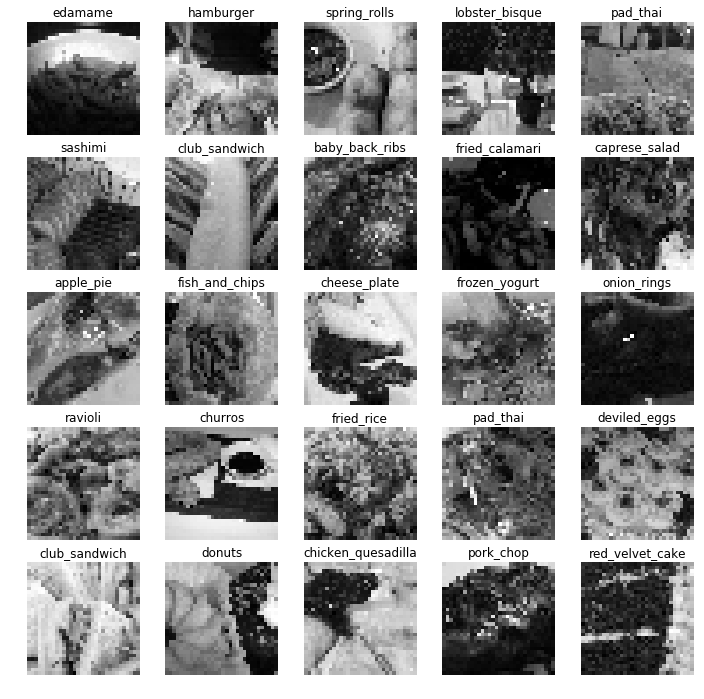

In [9]:
sample_imgs = 50
with h5py.File(train_h5_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
fig, m_ax = plt.subplots(5, 5, figsize = (12, 12))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])

### Import `sklearn` libraries 

http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, Normalizer
from sklearn.pipeline import make_pipeline

#### Define pipeline of transformations

Use `make_pipeline` from `sklearn.pipeline`.

#### Hint: Can you try different classifiers? Logistic Regression, SVM, RandomForestClassifier

In [11]:
full_pipeline = make_pipeline(
    FunctionTransformer(lambda x: x.reshape((x.shape[0],-1)), validate = False), 
    Normalizer(),
    # TODO:Put your classifier name
    LogisticRegression()
)

### Training

#### Hint: How to `fit` your input and output? 

- Always a good idea to track the training time

In [12]:
%%time
full_pipeline.fit(X_train, y_train_cat)

CPU times: user 2min 13s, sys: 40 ms, total: 2min 13s
Wall time: 2min 13s


Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x7f0d397d1268>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=False)), ('normalizer', Normalizer(copy=True, norm='l2')), ('logisticregr...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

### Prediction time! 

Test the trained model on the test data.

In [13]:
%%time
y_train_pred = full_pipeline.predict(X_train)
y_pred = full_pipeline.predict(X_test)

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 89.8 ms


### Evaluate the prediction

- Training and test accuracy 
- precision, recall, f1-score

#### Hint: Can you use inbuilt functions given by `sklearn`

In [14]:
from sklearn.metrics import classification_report, classification

### Check accuracies using confusion matrix

Text(0.5,1.05,'Validation Results')

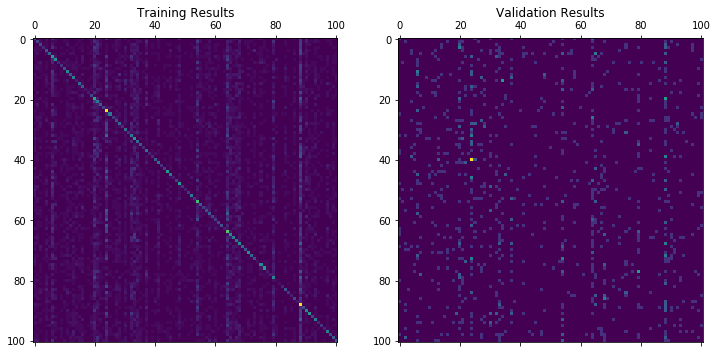

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))
ax1.matshow(classification.confusion_matrix(y_train_cat, y_train_pred))
ax1.set_title('Training Results')
ax2.matshow(classification.confusion_matrix(y_test_cat, y_pred))
ax2.set_title('Validation Results')

### Print other metrics

#### Goal: Improve precision, recall and hence F1-score

In [16]:
print(classification_report(y_test_cat, y_pred))

             precision    recall  f1-score   support

          0       0.07      0.12      0.09         8
          1       0.00      0.00      0.00        10
          2       0.00      0.00      0.00        11
          3       0.00      0.00      0.00        14
          4       0.10      0.10      0.10        10
          5       0.00      0.00      0.00        20
          6       0.00      0.00      0.00        11
          7       0.00      0.00      0.00         7
          8       0.00      0.00      0.00        11
          9       0.00      0.00      0.00         4
         10       0.00      0.00      0.00         7
         11       0.00      0.00      0.00         9
         12       0.00      0.00      0.00        12
         13       0.06      0.11      0.08         9
         14       0.00      0.00      0.00        13
         15       0.00      0.00      0.00        10
         16       0.00      0.00      0.00         9
         17       0.00      0.00      0.00   

/home/megha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Visual results

#### Hint: Use the same code used for visualizing input data from the previous session? 

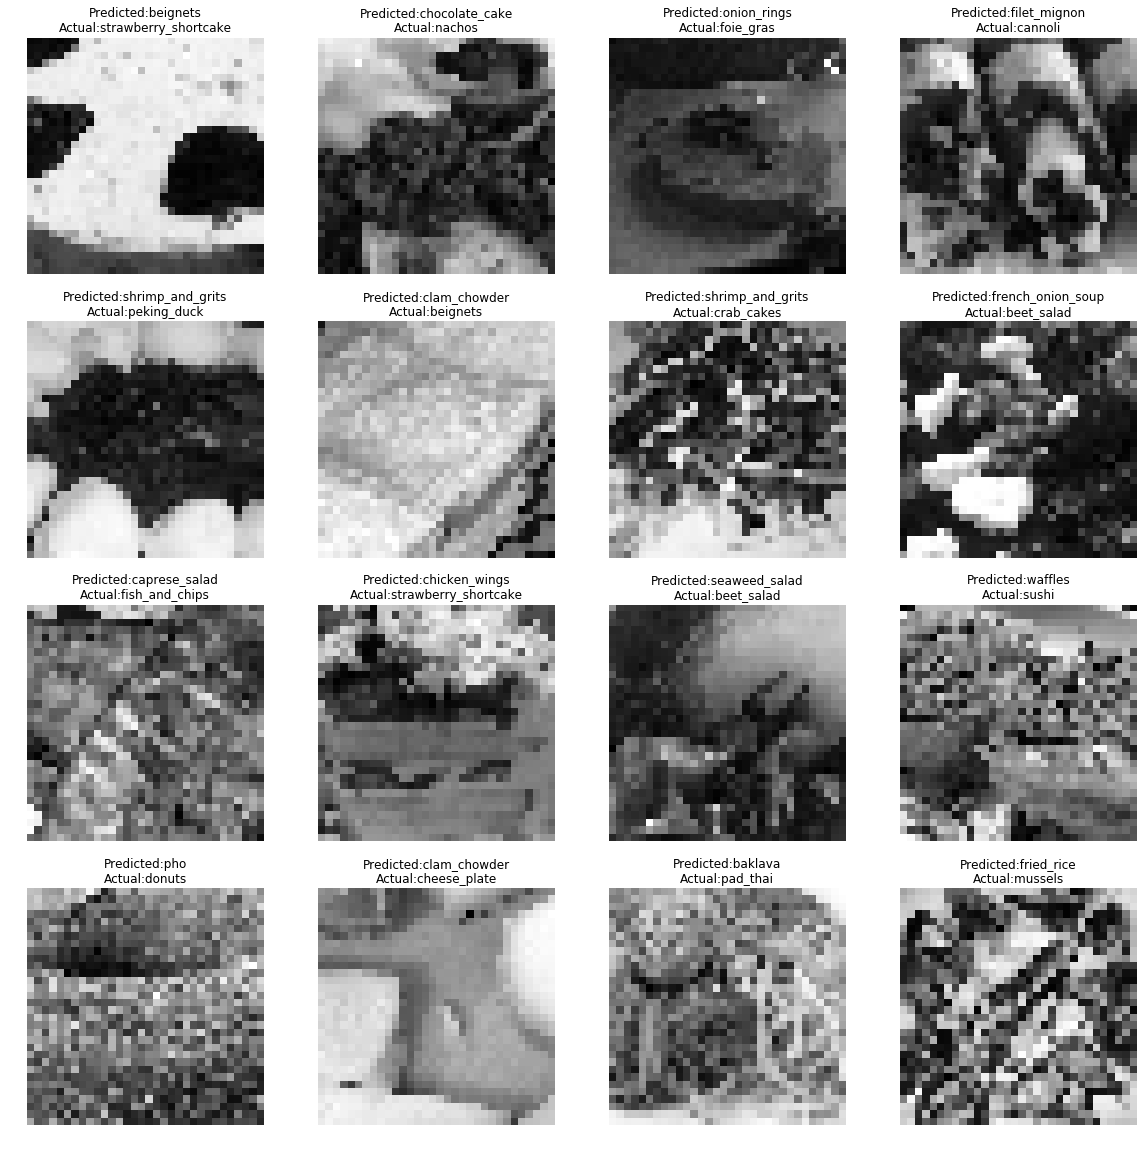

In [17]:
sample_imgs = 16
with h5py.File(test_h5_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'].value[read_idxs]
    label_names = [x.decode() for x in n_file['category_names'].value]
pred_label = full_pipeline.predict_proba(im_data)
fig, m_ax = plt.subplots(4, 4, figsize = (20, 20))
for c_ax, c_label, c_pred, c_img in zip(m_ax.flatten(), im_label, pred_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
    c_ax.axis('off')
    c_ax.set_title('Predicted:{}\nActual:{}'.format(label_names[np.argmax(c_pred)],
                                                  label_names[np.argmax(c_label)]))